## Local Vol Model
This notebook uses the model `finmc.models.localvol.LVMC` and shows how to
- create dataset for this model, with and without a term structure of vol
- use `finmc` calcs to plot asset evolution and implied vol.

In [26]:
import numpy as np

from finmc.calc.impliedvol import iv_surface_mc, atmvols_mc
from finmc.calc.option import opt_price_mc
from finmc.models.localvol import LVMC
from finmc.plots.asset import plot_asset
from finmc.plots.impliedvol import plot_iv, plot_atmvols

Create dataset for this model. See [Local-Vol Model Documentation](https://finlib.github.io/finmc/models/localvol/) for explanation of model parameters.

In [27]:
# Define Dataset with zero rate curve, and forward curve.
dataset = {
    "MC": {"PATHS": 100_000, "TIMESTEP": 1 / 20},
    "BASE": "USD",
    "ASSETS": {
        "USD": ("ZERO_RATES", np.array([[2.0, 0.05]])),
        "SPX": ("FORWARD", np.array([[0.0, 5500], [1.0, 5600]])),
    },
    "LV": {"ASSET": "SPX", "VOL": 0.3},
}

### Calculate Price

In [28]:
model = LVMC(dataset)
price = opt_price_mc(100.0, 1.0, "Call", "SPX", model)
print(price)

5231.122274870787


### Evolution of the asset.

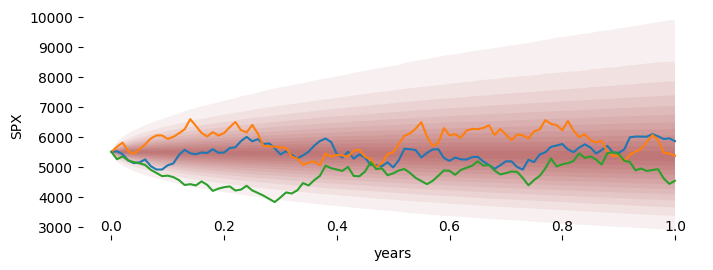

In [29]:
plot_asset(model, "SPX")

### Plot the Implied Volatility Surface, and ATM Volatilities.

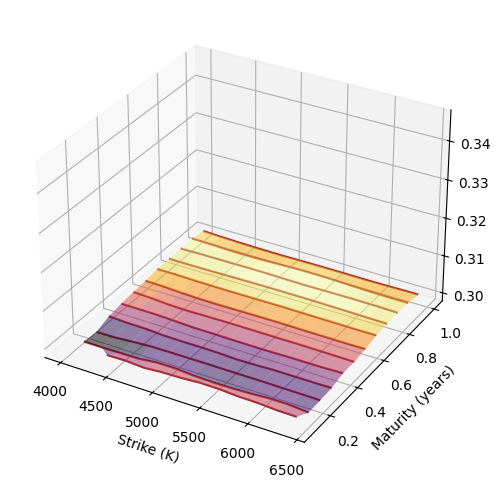

In [30]:
# Calculate the implied volatility surface
strikes = np.linspace(4000, 6400, 13)
expirations = np.linspace(1 / 12, 1, 12)
# expirations = np.array([1 / 12, 1 / 6, 1 / 4, 1 / 2, 1])
surface = iv_surface_mc(
    strikes,
    expirations,
    asset_name="SPX",
    model=model,
)
plot_iv(strikes, expirations, surface)

### Use a Local Volatility Surface that is not flat.

In [31]:
import numpy as np
from scipy.interpolate import RegularGridInterpolator

voltimes = [0.2, 1.0]
volstrikes = [-0.5, 0.0, 0.5]  # log-moneyness
vols = np.array([[0.7, 0.3, 0.5], [0.6, 0.5, 0.6]])
volinterp = RegularGridInterpolator(
    (voltimes, volstrikes),
    vols,
    method="nearest",
    fill_value=None,
    bounds_error=False,
)

dataset["LV"]["VOL"] = volinterp

Plot again.

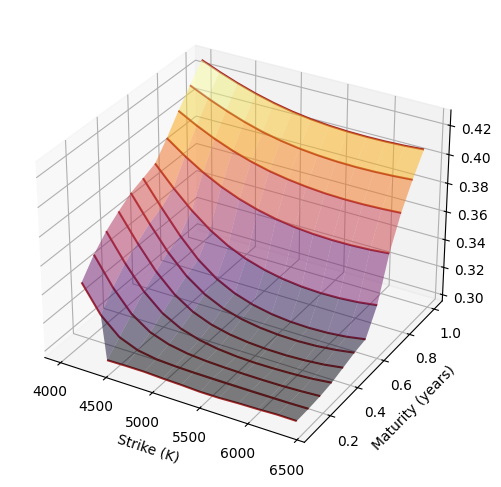

In [32]:
surface = iv_surface_mc(
    strikes,
    expirations,
    asset_name="SPX",
    model=model,
)
plot_iv(strikes, expirations, surface)

### Plot ATM Volatilities

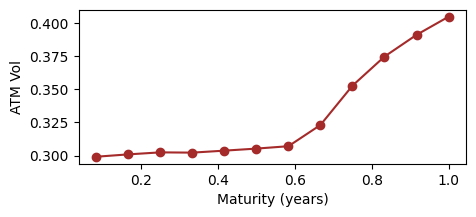

In [33]:
atmvols, fwds = atmvols_mc(
    expirations,
    asset_name="SPX",
    model=model,
)
plot_atmvols(expirations, atmvols)